<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/homeworks/h2/hw_02.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Tarea N°02

## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Jesús Elías Martínez Quezada

* __Rol__: 201910511-6

2.- Debes _subir_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
   - Soluciones
   - Código
   - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import time


%matplotlib inline

In [2]:
def mae(targets, predictions) -> float:
    """
    Calculo de la metrica: mean absolute error (MAE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.abs(error).mean(), 4)


def mse(targets, predictions) -> float:
    """
    Calculo de la metrica: mean squared error (MSE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round((error ** 2).mean(), 4)


def rmse(targets, predictions) -> float:
    """
    Calculo de la metrica: root mean squared error (RMSE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.sqrt((error ** 2).mean()), 4)


# b) Percentage errors

def mape(targets, predictions) -> float:
    """
    Calculo de la metrica: mean absolute percentage error (MAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets

    if any(x == 0 for x in targets):
        return np.inf
    else:
        return round(np.abs(error / targets).mean(),4)


def maape(targets, predictions) -> float:
    """
    Calculo de la metrica:  mean arctangent percentage error  (MAAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """

    error = predictions - targets

    if any((x, y) == (0, 0) for x, y in zip(predictions, targets)):
        return np.inf

    else:
        return round(np.arctan(np.abs(error / targets)).mean(),4)


def wmape(targets, predictions) -> float:
    """
    Calculo de la metrica:  weighted mean absolute percentage error (WMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    sum_values = np.sum(targets)

    if sum_values == 0:
        return np.inf
    else:
        return round(np.abs(error).sum() / sum_values,4)


def mmape(targets, predictions) -> float:
    """
    Calculo de la metrica: modified mean absolute percentage error (MMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = np.abs(predictions - targets)
    denom = 1 + np.abs(targets)

    return round(np.mean(error / denom),4)


def smape(targets, predictions) -> float:
    """
    Calculo de la metrica: symmetric mean absolute percentage error (SMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    sum_values = np.abs(predictions) + np.abs(targets)

    if any(x == 0 for x in sum_values):
        return np.inf

    else:
        return round(2 * np.mean(np.abs(error) / sum_values),4)

def summary_metrics(df) -> pd.DataFrame:
    """
    Aplicar las distintas metricas definidas
    :param df:  dataframe con las columnas: ['y','yhat']
    :return: dataframe con las metricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mae(y_true, y_pred), 4)]
    df_result['mse'] = [round(mse(y_true, y_pred), 4)]
    df_result['rmse'] = [round(rmse(y_true, y_pred), 4)]

    df_result['mape'] = [round(mape(y_true, y_pred), 4)]
    df_result['maape'] = [round(maape(y_true, y_pred), 4)]
    df_result['wmape'] = [round(wmape(y_true, y_pred), 4)]
    df_result['mmape'] = [round(mmape(y_true, y_pred), 4)]
    df_result['smape'] = [round(smape(y_true, y_pred), 4)]

    # nombre del modelo por defecto
    #try:
    #    model = df['model'][0]
    #    df_result['model'] = [model]
    #except:
    #    df_result['model'] = ['---']

    return df_result

In [3]:
def summary_metrics(df) -> pd.DataFrame:
    """
    Aplicar las distintas metricas definidas
    :param df:  dataframe con las columnas: ['y','yhat']
    :return: dataframe con las metricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['accuracy'] = [round(accuracy_score(y_true,y_pred),4)]
    df_result['recall'] = [round(recall_score(y_true,y_pred, average="macro"),4)]
    df_result['precision'] = [round(precision_score(y_true,y_pred, average="macro"),4)]
    df_result['fscore'] = [round(f1_score(y_true,y_pred, average="macro"),4)]


    return df_result

In [4]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [7]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [8]:
digits.describe() #Un describe de los datos y ver que el comportamiento es similar en todos, ademas hay 1797 registros por clase

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [9]:
digits.isnull().sum() #No hay datos nulos

c00       0
c01       0
c02       0
c03       0
c04       0
         ..
c60       0
c61       0
c62       0
c63       0
target    0
Length: 65, dtype: int64

In [10]:
digits.dtypes #el tipo de datos son int64

c00       int64
c01       int64
c02       int64
c03       int64
c04       int64
          ...  
c60       int64
c61       int64
c62       int64
c63       int64
target    int64
Length: 65, dtype: object

In [11]:
digits.info() #Se usan 912.7 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int64
 1   c01     1797 non-null   int64
 2   c02     1797 non-null   int64
 3   c03     1797 non-null   int64
 4   c04     1797 non-null   int64
 5   c05     1797 non-null   int64
 6   c06     1797 non-null   int64
 7   c07     1797 non-null   int64
 8   c08     1797 non-null   int64
 9   c09     1797 non-null   int64
 10  c10     1797 non-null   int64
 11  c11     1797 non-null   int64
 12  c12     1797 non-null   int64
 13  c13     1797 non-null   int64
 14  c14     1797 non-null   int64
 15  c15     1797 non-null   int64
 16  c16     1797 non-null   int64
 17  c17     1797 non-null   int64
 18  c18     1797 non-null   int64
 19  c19     1797 non-null   int64
 20  c20     1797 non-null   int64
 21  c21     1797 non-null   int64
 22  c22     1797 non-null   int64
 23  c23     1797 

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [12]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

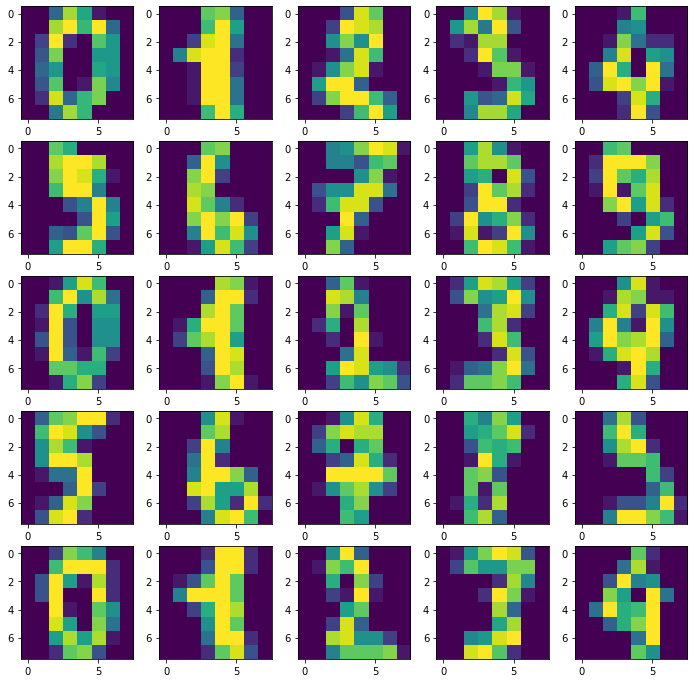

In [13]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))

for i in range(25): #se usan 25 pues es 5*5
    axs[i//5,i%5].imshow(digits_dict["images"][i]) #se usa la llave "images"

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [14]:
#Librerías
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing

In [15]:
X = digits.drop(columns="target").values
y = digits["target"].values

In [16]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=150)

In [17]:
print("Largo Grupo entrenamiento:\n", len(X_train))
print("Largo Grupo de testeo:\n", len(X_test))

Largo Grupo entrenamiento:
 1527
Largo Grupo de testeo:
 270


Regresión Logística

In [18]:
#MODELO DE REGRESION LOGISTICA
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

# predecir
lr_pred = lr.predict(X_test)
y_true = y_test

#Guardamos los datos para la comparativa final
accuracy1=accuracy_score(y_test, lr_pred)
recall1=recall_score(y_test, lr_pred,average='weighted')
precision1=precision_score(y_test, lr_pred,average='weighted' )
fscore1=f1_score(y_test, lr_pred,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,lr_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy1)
print('recall:     ',recall1)
print('precision:  ',precision1)
print('f-score:    ',fscore1)
print("")


Matriz de confusion:
 
[[27  0  0  0  0  1  0  0  0  0]
 [ 0 29  0  0  0  0  1  0  4  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  1  0]
 [ 0  1  0  0 20  0  0  0  0  0]
 [ 0  1  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  1]
 [ 0  1  0  0  0  0  0  0 22  0]
 [ 0  0  0  1  0  0  0  0  1 29]]

Metricas:
 
accuracy:    0.9518518518518518
recall:      0.9518518518518518
precision:   0.9551216788985606
f-score:     0.9524979323646522



In [19]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
import time

#Diccionario de Hiperparámetros
dicc_rlog = {
          'penalty' : ['l1', 'l2'],
          'C' : [100, 10 , 1, 0.1, 0.01, 0.001],
          'class_weight' : ['balanced', None],
          'solver' : ['liblinear'],
          }
grid_lr = GridSearchCV(estimator = lr, param_grid = dicc_rlog, refit = True, n_jobs=-1) 

start_time = time.time() #Tiempo de inicio 

grid_result_lr = grid_lr.fit(X_train, y_train)
grid_result_lr
print("Tuned Hyperparameters :", grid_result_lr.best_params_)
print("Accuracy :",grid_result_lr.best_score_)
print("Este modelo se ajustó en",(time.time() - start_time),"segundos.") 

Tuned Hyperparameters : {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.9679031393978356
Este modelo se ajustó en 22.91735577583313 segundos.


In [20]:
#MODELO REGRESION LOGISTICA HIPERPARAMETROS
lrg = LogisticRegression(C=0.01, class_weight='balanced', penalty='l2', solver = 'liblinear').fit(X_train, y_train)

# predecir
lr_pred = lrg.predict(X_test)
y_true = y_test

#Guardamos los datos para la comparativa final
accuracy2=accuracy_score(y_test, lr_pred)
recall2=recall_score(y_test, lr_pred,average='weighted')
precision2=precision_score(y_test, lr_pred,average='weighted' )
fscore2=f1_score(y_test, lr_pred,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,lr_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy2)
print('recall:     ',recall2)
print('precision:  ',precision2)
print('f-score:    ',fscore2)
print("")


Matriz de confusion:
 
[[27  0  0  0  0  1  0  0  0  0]
 [ 0 30  0  0  0  0  1  0  3  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  1  0]
 [ 0  0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0  0 20  1  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  1]
 [ 0  1  0  0  0  0  1  0 21  0]
 [ 0  0  0  0  0  0  0  0  1 30]]

Metricas:
 
accuracy:    0.9592592592592593
recall:      0.9592592592592593
precision:   0.9620476894670442
f-score:     0.9597807279325844



Podemos ver que el modelo con los hiperparámetros ajustados solo mejora un poco al modelo de regresión logística sin hiperparámetros ajustados.

KNN

In [21]:
#MODELO KNN
knn = neighbors.KNeighborsClassifier().fit(X_train, y_train)

# predecir
knn_pred = knn.predict(X_test)
y_true = y_test

#Guardamos los datos para la comparativa final
accuracy3=accuracy_score(y_test, knn_pred)
recall3=recall_score(y_test, knn_pred,average='weighted')
precision3=precision_score(y_test, knn_pred,average='weighted' )
fscore3=f1_score(y_test, knn_pred,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,knn_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy3)
print('recall:     ',recall3)
print('precision:  ',precision3)
print('f-score:    ',fscore3)
print("")


Matriz de confusion:
 
[[28  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0  0 20  1  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 26  0  0]
 [ 0  1  0  0  0  0  0  0 22  0]
 [ 0  0  0  0  1  0  0  0  0 30]]

Metricas:
 
accuracy:    0.9888888888888889
recall:      0.9888888888888889
precision:   0.9892825334760817
f-score:     0.988872474261948



In [22]:
#Diccionario de Hiperparámetros
dicc_knn = {
          'n_neighbors' : [1,2,3,4,5, 6, 10, 15,30],
          'weights' : ['uniform', 'distance'],
          'metric' : ['euclidean', 'minkowski'],
          'algorithm' : ['auto','brute', 'kd_tree']
          }


grid_knn = GridSearchCV(estimator = knn, param_grid = dicc_knn, cv = 20) 

start_time = time.time() #Tiempo de inicio 

grid_result_knn = grid_knn.fit(X_train, y_train)
print("Tuned Hyperparameters :", grid_knn.best_params_)
print("Accuracy :",grid_knn.best_score_)
print("Este modelo se ajustó en",(time.time() - start_time),"segundos.") 

Tuned Hyperparameters : {'algorithm': 'kd_tree', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy : 0.9882347915242653
Este modelo se ajustó en 23.95357584953308 segundos.


In [23]:
#MODELO KNN HIPERPARAMETROS
knng = neighbors.KNeighborsClassifier(algorithm = 'kd_tree', metric= 'euclidean', n_neighbors=3, weights='uniform').fit(X_train, y_train)

# predecir
knng_pred = knng.predict(X_test)
y_true = y_test

#Guardamos los datos para la comparativa final
accuracy4=accuracy_score(y_test, knng_pred)
recall4=recall_score(y_test, knng_pred,average='weighted')
precision4=precision_score(y_test, knng_pred,average='weighted' )
fscore4=f1_score(y_test, knng_pred,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,knng_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy4)
print('recall:     ',recall4)
print('precision:  ',precision4)
print('f-score:    ',fscore4)
print("")


Matriz de confusion:
 
[[28  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0  0 20  1  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  1]
 [ 0  1  0  0  0  0  0  0 22  0]
 [ 0  0  0  0  1  0  0  0  0 30]]

Metricas:
 
accuracy:    0.9851851851851852
recall:      0.9851851851851852
precision:   0.9855788297723781
f-score:     0.9851628179646994



Notemos ninguna métrica mejoró.



Random Forest

In [24]:
#MODELO RANDOMFOREST
rfc =  RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

#predecir
y_true =  y_test
rfc_pred = rfc.predict(X_test)

#Guardamos los datos para la comparativa final
accuracy5=accuracy_score(y_true, rfc_pred)
recall5=recall_score(y_true, rfc_pred,average='weighted')
precision5=precision_score(y_true, rfc_pred,average='weighted')
fscore5=f1_score(y_true, rfc_pred,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,knn_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy5)
print('recall:     ',recall5)
print('precision:  ',precision5)
print('f-score:    ',fscore5)
print("")


Matriz de confusion:
 
[[28  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0  0 20  1  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 26  0  0]
 [ 0  1  0  0  0  0  0  0 22  0]
 [ 0  0  0  0  1  0  0  0  0 30]]

Metricas:
 
accuracy:    0.9777777777777777
recall:      0.9777777777777777
precision:   0.9785831231470419
f-score:     0.9775860138960497



In [25]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
 

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model

start_time = time.time() #Tiempo de inicio 
rfc_random.fit(X_train, y_train)
print("Este modelo se ajustó en",(time.time() - start_time),"segundos.") 
print(rfc_random.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Este modelo se ajustó en 19.57900857925415 segundos.
{'n_estimators': 166, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


In [26]:
#MODELO RANDOMFOREST HIPERPARAMETROS
rfcg =  RandomForestClassifier(n_estimators=144,min_samples_split=2,min_samples_leaf=2,max_features='auto',max_depth=60, bootstrap=False).fit(X_train,y_train)

#predecir
y_true =  y_test
rfcg_pred = rfcg.predict(X_test)

#Guardamos los datos para la comparativa final
accuracy6=accuracy_score(y_true, rfcg_pred)
recall6=recall_score(y_true, rfcg_pred,average='weighted')
precision6=precision_score(y_true, rfcg_pred,average='weighted')
fscore6=f1_score(y_true, rfcg_pred,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,knn_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy6)
print('recall:     ',recall6)
print('precision:  ',precision6)
print('f-score:    ',fscore6)
print("")


Matriz de confusion:
 
[[28  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0  0 20  1  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 26  0  0]
 [ 0  1  0  0  0  0  0  0 22  0]
 [ 0  0  0  0  1  0  0  0  0 30]]

Metricas:
 
accuracy:    0.9814814814814815
recall:      0.9814814814814815
precision:   0.9818344898211417
f-score:     0.9814554529146251



Mejoró bastante todas las métricas.

Podemos ver que el modelo que más tardó en ajustarse fue el de Regresió Logística, y el que menos tardó en ajustarse fue KNN.

El mejor modelo al observar las métricas resulta ser el KNN.

Como KNN resulta tener las mejores métricas, y además no tardó mucho en ajustarse, se elegirá este para el procedimiento.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [27]:
#Cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)

print(scores)
#Podemos ver que en la 9na iteración saca 100% de accuracy.
m=scores.mean()
#La media es un accuracy de 98%
s=scores.std()*2
#Tendremos que el error será:
print('El intervalo de confianza es:\n', m ,"±",s)

[0.97385621 0.99346405 0.98039216 0.99346405 0.9869281  0.9869281
 0.97385621 0.98026316 1.         0.99342105]
El intervalo de confianza es:
 0.9862573099415204 ± 0.017004227966044103


Curva de Validación

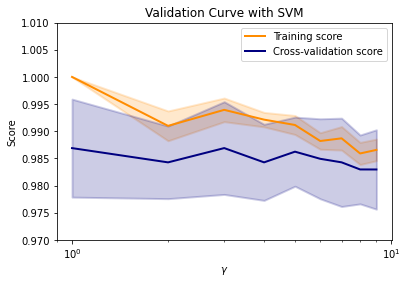

In [28]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.array([i for i in range (1,10)])
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(algorithm = 'kd_tree', metric= 'euclidean', n_neighbors=3, weights='uniform').fit(X_train, y_train),
    X_train,
    y_train,
    param_name="n_neighbors",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.97, 1.01)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

Curva AUC–ROC

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score


# Binarize the output
ry = label_binarize(y, classes=digits["target"].unique())
n_classes = y_test.shape[0]

n_samples, n_features = X.shape

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, ry,
                                                    test_size=0.3,
                                                    train_size = 0.7)
                                                    

# Learn to predict each class against the other
classifier = OneVsRestClassifier(KNeighborsClassifier())
y_score = classifier.fit(X_train, y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[i], y_score[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

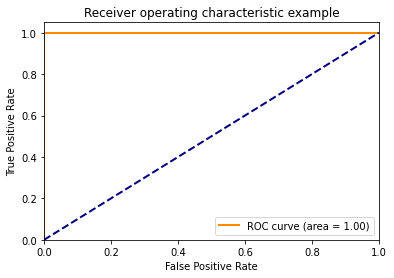

In [30]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import matplotlib.pyplot as plt
import seaborn as sns 

Selección de Atributos

In [32]:
k = 20 # número de atributos a seleccionar
x_training = digits.drop(["c00","c32","c39","target"], axis = 1) #se sacan pues saltaba un warning donde mencionaba que eran consantes
y_training = digits["target"]

columnas = list(x_training.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(x_training, y_training)

In [33]:
catrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(catrib.nonzero()[0])]
atri=list(atributos)
print(atri)

['c02', 'c10', 'c13', 'c20', 'c21', 'c26', 'c28', 'c30', 'c33', 'c34', 'c36', 'c38', 'c42', 'c43', 'c44', 'c46', 'c54', 'c58', 'c60', 'c61']


In [34]:
import time

start_time = time.time()

# Creando el modelo
Xr = digits.drop(columns="target").values
yr = digits["target"].values
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.15, random_state=150)


knn0 = KNeighborsClassifier()
knn0.fit(Xr_train, yr_train) # ajustando el modelo

predicciones = knn0.predict(Xr_test)

time = time.time() - start_time
print("El tiempo de ejecución es;", time)

df_pred = pd.DataFrame({
    'y':yr_test,
    'yhat':predicciones
})

df_s1 = summary_metrics(df_pred).assign(name = 'Todas las variables')

El tiempo de ejecución es; 0.029663801193237305


In [35]:
import time

start_time = time.time()
# Entrenamiento con las variables seleccionadas
Xc = digits[atributos]
y = digits['target']


# split dataset
Xc_train, X_test, yc_train, y_test = train_test_split(Xc, y, test_size=0.15, random_state = 150) 

# Creando el modelo
knn1 = KNeighborsClassifier()
knn1.fit(Xc_train, yc_train) # ajustando el modelo

prediccionesb = knn1.predict(X_test)

time = time.time() - start_time
print("El tiempo de ejecución es:", time)

df_pred = pd.DataFrame({
    'y':y_test,
    'yhat':prediccionesb
})

df_s2 = summary_metrics(df_pred).assign(name = 'Variables Seleccionadas')

El tiempo de ejecución es: 0.024771690368652344


In [36]:
# juntar resultados en formato dataframe
pd.concat([df_s1,df_s2])

,accuracy,recall,precision,fscore,name
0,0.9889,0.9877,0.9894,0.9883,Todas las variables
0,0.9481,0.9446,0.9467,0.9454,Variables Seleccionadas


Podemos ver que el código tarda menos en ejecutarse con menos variables, y que los atributos empeoran un poco. Sin embargo, que empeoren solo un poco significa que no basta con utilizar todas las variables, sino que basta solo con 15.

Reducción de Atributos

In [37]:
#Creamos una copia de los datos
scaled_features = digits.copy()
#Creamos el nombre de las columnas target
col_names = digits.columns.drop(['target'])
#creamos las caracteristicas con col_names
features = scaled_features[col_names]
#Definimos StandardScaler y aplicamos los métodos
scaler = StandardScaler()
scaler_fit = StandardScaler().fit(features.values)
features = scaler_fit.transform(features.values)
scaled_features[col_names] = features
scaled_features.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008,0
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008,1
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008,2
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008,3
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008,4


In [38]:
df_scaled_aux=scaled_features.drop(['target'],axis=1)
df_scaled_aux.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c54,c55,c56,c57,c58,c59,c60,c61,c62,c63
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008


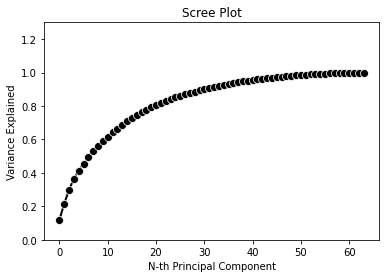

In [39]:
#Ahora, podemos verificar usando la regla del codo, cuántas variables realmente aportan en el modelo para delimitar mejor el problema
#Perform PCA (w/o limits on n_components)
pca = PCA()
_ = pca.fit_transform(df_scaled_aux)
PC_components = np.arange(pca.n_components_)+1
recta = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)
plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1.3)
plt.show()
#Notemos que entre los 20 primeros componentes se tiene que el gráfico se comprota de forma asintótica.

In [40]:
df_scaled_aux.columns #Vemos las columnas de nuestro df_scaled (que recordemos, no tiene ni el id ni el diagnosis)

Index(['c00', 'c01', 'c02', 'c03', 'c04', 'c05', 'c06', 'c07', 'c08', 'c09',
       'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19',
       'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29',
       'c30', 'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c39',
       'c40', 'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c47', 'c48', 'c49',
       'c50', 'c51', 'c52', 'c53', 'c54', 'c55', 'c56', 'c57', 'c58', 'c59',
       'c60', 'c61', 'c62', 'c63'],
      dtype='object')

In [41]:
#Finalmente, creamos el df_scaled definitivo
df_scaled=scaled_features.drop(['c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29',
       'c30', 'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c39',
       'c40', 'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c47', 'c48', 'c49',
       'c50', 'c51', 'c52', 'c53', 'c54', 'c55', 'c56', 'c57', 'c58', 'c59',
       'c60', 'c61', 'c62', 'c63','target'],axis=1)
df_scaled.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,0.482974,0.759622,-0.058426,1.127721,0.879583,-0.130433,-0.044625,0.111443,0.895880,-0.860666
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,-1.915573,-0.246304,1.196450,0.136195,-0.514991,-0.130433,-0.044625,-0.727646,-1.213385,1.380308
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,-1.362062,1.011104,0.987304,0.962467,-0.514991,-0.130433,-0.044625,-0.727646,-0.334525,1.035543
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,0.482974,-1.503711,0.987304,-0.690077,-0.514991,-0.130433,-0.044625,-0.168254,-1.564930,1.035543
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,-1.915573,-1.252229,-0.476718,-1.351095,-0.514991,-0.130433,-0.044625,-0.727646,-1.564930,1.035543


In [42]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_scaled)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [43]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df_scaled.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4',
              'PC5','PC6','PC7','PC8','PC9','PC10',
               'PC11','PC12','PC13','PC14','PC15',
               'PC16','PC17','PC18','PC19','PC20'
              ]
)

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19
PC1,-0.0,0.278163,0.414398,0.331607,0.042468,0.041060,-0.050999,-0.096682,0.082154,0.410888,0.421194,-0.189131,-0.024248,0.097415,-0.088758,-0.123931,0.046506,0.323215,0.032716,-0.309403
PC2,-0.0,0.010320,0.006391,-0.071565,0.238265,0.443473,0.448471,0.317675,-0.001800,0.004771,0.035115,-0.126992,-0.018910,0.312387,0.458570,0.286199,-0.017880,-0.001327,-0.061613,-0.166147
PC3,-0.0,0.066589,0.067909,0.130262,-0.366025,-0.205265,0.184859,0.382683,-0.018218,0.045253,0.161883,0.304235,-0.243148,-0.363314,0.107454,0.375027,0.026734,0.137046,0.359911,0.061421
PC4,0.0,0.412970,0.233221,-0.032241,-0.107837,-0.142626,0.020807,0.209360,0.110341,0.241610,-0.248131,-0.087500,0.313761,-0.175970,-0.004967,0.230452,0.037762,-0.174191,-0.548420,0.207206
PC5,0.0,-0.055526,-0.197380,-0.175253,0.159311,0.059675,-0.000958,-0.001368,0.555382,0.172899,-0.045469,0.179675,0.210689,0.023935,-0.026801,0.022470,0.566695,0.332357,0.137277,0.170208
PC6,0.0,-0.133433,-0.085234,-0.107889,-0.219952,-0.091207,-0.055960,0.023582,0.294973,-0.023147,-0.133756,-0.508478,-0.569859,-0.140233,0.027007,0.036341,0.254920,-0.065509,-0.201864,-0.287124
PC7,-0.0,-0.415838,-0.013983,0.433549,0.114413,-0.274818,-0.212702,0.288867,0.101852,-0.189098,0.174636,0.039024,0.267608,0.200096,-0.108674,0.270421,0.148701,-0.195194,-0.159238,-0.247597
PC8,-0.0,0.125316,0.210199,0.369393,-0.088127,0.122129,0.243723,-0.211869,0.204865,-0.226356,0.062346,0.299023,-0.171792,0.008031,0.197829,-0.309762,0.318049,-0.448738,-0.077625,0.130263
PC9,-0.0,-0.132208,0.111771,-0.217525,-0.629141,-0.097752,0.093262,-0.077466,-0.289121,-0.071245,0.111236,-0.168670,0.354436,0.274283,0.201717,-0.110674,0.332633,0.087666,0.024673,-0.020406
PC10,0.0,0.119950,-0.038267,0.061988,0.333816,0.054018,-0.036052,0.038488,-0.644888,-0.030661,-0.067527,-0.008242,-0.119995,-0.212960,-0.108495,0.063974,0.596765,0.058742,-0.071560,-0.037563


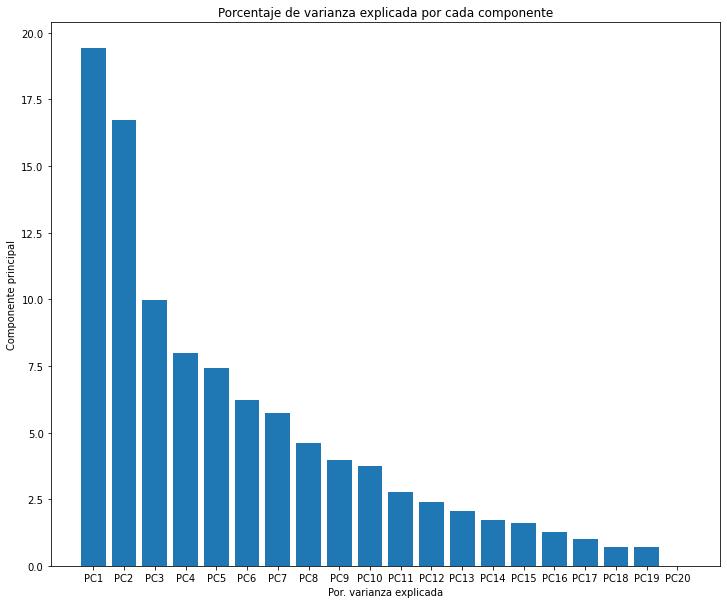

In [44]:
# graficar varianza por componente
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4',
              'PC5','PC6','PC7','PC8','PC9','PC10',
               'PC11','PC12','PC13','PC14','PC15',
               'PC16','PC17','PC18','PC19','PC20'
              ]
plt.figure(figsize=(12,10))
plt.bar(x= range(1,21), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()


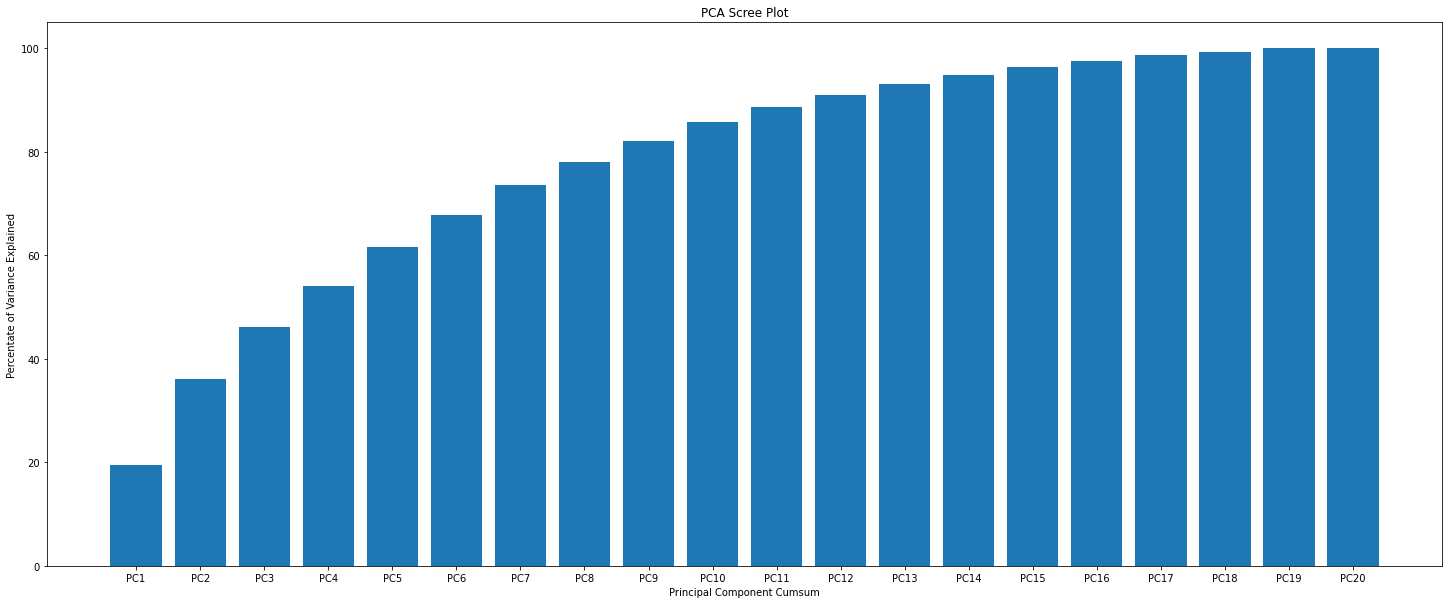

In [45]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC2', 'PC3', 'PC4',
              'PC5','PC6','PC7','PC8','PC9','PC10',
               'PC11','PC12','PC13','PC14','PC15',
               'PC16','PC17','PC18','PC19','PC20'
              ]
plt.figure(figsize=(25,10))
plt.bar(x= range(1,21), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()


In [46]:

# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=df_scaled)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4',
              'PC5','PC6','PC7','PC8','PC9','PC10',
               'PC11','PC12','PC13','PC14','PC15',
               'PC16','PC17','PC18','PC19','PC20'
              ],
    index   = df_scaled.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,0.127369,-0.054001,0.519237,-1.285435,-0.226352,-0.250145,0.812908,0.306346,0.954096,-0.649430,-0.241592,1.224512,-0.154324,0.354302,-0.358432,0.075275,0.463428,0.392268,0.045003,0.0
1,-2.174779,-0.679098,-1.594944,1.301073,0.232688,-0.348854,0.413913,-0.115308,-0.145377,0.125505,0.014019,-0.402314,-0.439535,-0.133769,-0.743021,-0.599259,-0.403877,-0.195220,0.203144,0.0
2,-2.512463,0.239820,-1.746770,0.123425,0.949269,-1.149500,-0.488322,-0.361290,-0.119345,-0.017276,0.368257,0.624952,-0.196815,-0.789326,0.696941,0.067193,-0.158949,0.167312,0.197401,0.0
3,1.118036,-0.953483,-0.858954,1.945934,-0.110850,0.142788,0.600786,-0.663645,-0.018237,0.118448,0.011365,-1.699023,-0.620274,0.646079,-0.327477,1.030449,-0.605427,-0.553815,-0.175402,0.0
4,-2.908476,-1.222657,-1.086869,1.506892,-0.116273,1.957160,-1.162921,-1.181510,-0.035154,0.325440,0.009335,-0.424352,0.248402,0.043267,0.105650,0.423392,0.485839,0.055242,-0.567846,0.0


### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [47]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    y_pred = list(model.predict(X_test))

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == Y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != Y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    #y_aux_true = y_test[mask]
    #y_aux_pred = y_pred[mask]
    
    y_aux_true = np.array(Y_test)[mask]
  
    y_aux_pred = np.array(y_pred)[mask]

    
    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)

    plt.show()


**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

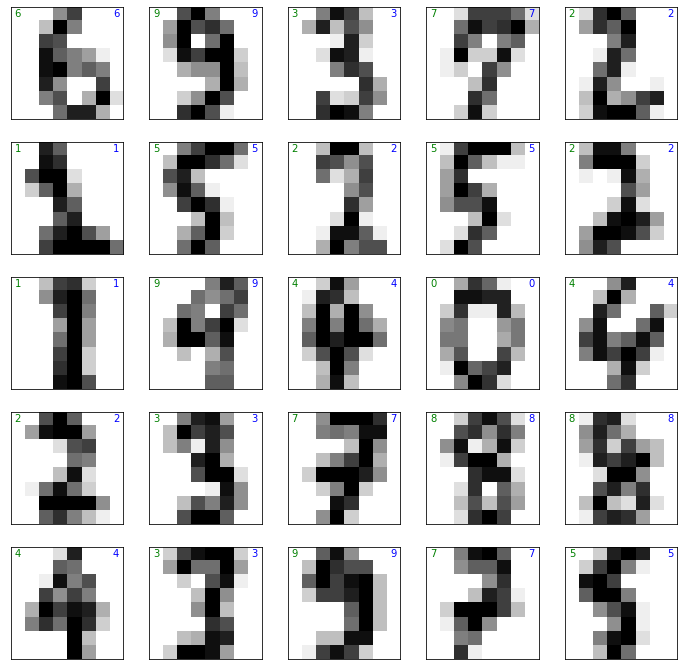

In [48]:
mostar_resultados(digits,KNeighborsClassifier(),nx=5, ny=5,label = "correctos")

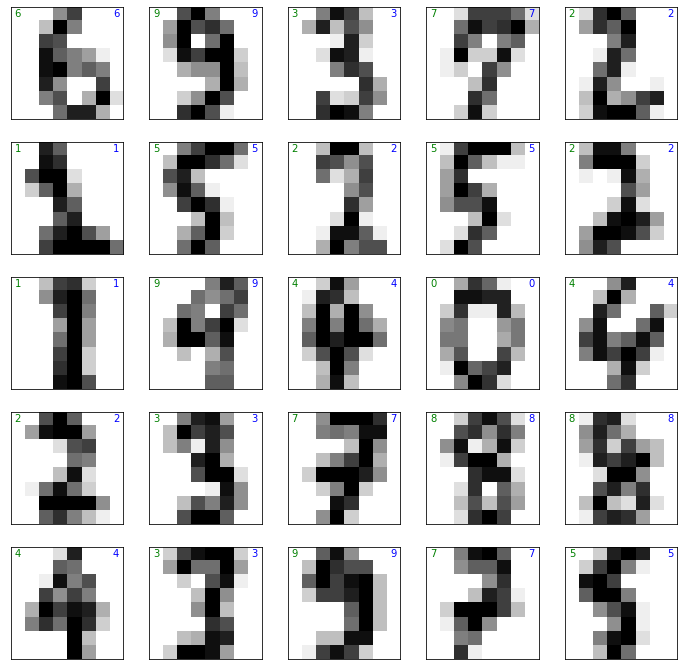

In [49]:
mostar_resultados(digits,KNeighborsClassifier(algorithm = 'kd_tree', metric= 'euclidean', n_neighbors=3, weights='uniform'),nx=5, ny=5,label = "correctos")

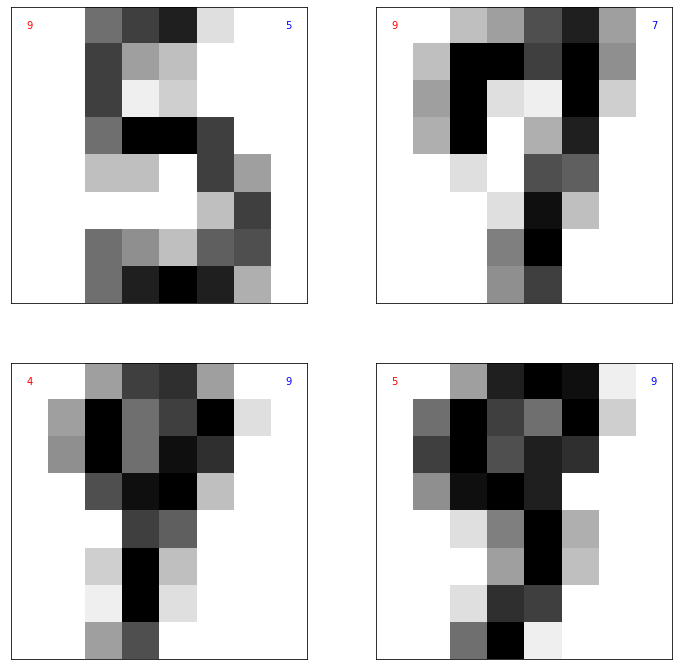

In [50]:
mostar_resultados(digits,KNeighborsClassifier(),nx=2, ny=2,label = "incorrectos") #tuve que poner nx=2 y ny=2 para que no saltara error, pero hay otro dígito más que es incorrecto

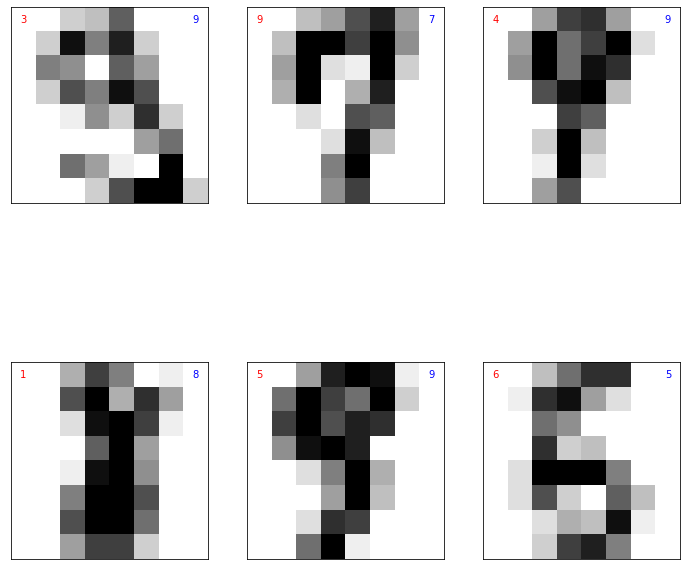

In [51]:
mostar_resultados(digits,KNeighborsClassifier(algorithm = 'kd_tree', metric= 'euclidean', n_neighbors=3, weights='uniform'),nx=2, ny=3,label = "incorrectos")

Se puede ver que, de hecho, el modelo con hiperparámetros ajustados falla en un dígito más que el de sin hiperparámetros (se puede hacer la prueba poniendo nx=2, ny=3, y ver que queda una cazilla blanca. Yo no lo quise hacer a efectos prácticos porque tira un error).
Estas fallas pueden ocurrir porque el valor está demasiado nublado y porque el modelo fallará ciertas veces, podemos ver que tiene un accurate cercano a 1, pero no es 1. Esto se podría solucionar, tal vez, tomando más cantidad de muestreo al momento de realizar el entrenamiento del modelo.

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Se pudieron predecir la mayoría de los dígitos utilizando KNN, mostrando que es un modelo eficiente y además, bastante rápido.
Las princiales dificultades vinieron del entendimiento del problema y el análisis del mismo. Tal vez para trabajos futuros se pueda mejorar el modelo para que las fallas disminuyan aún más, sin embargo, este se vio que era bastante bueno.

## II.- California Housing Prices


<img src="https://www.wartsila.com/images/default-source/default-album/california_housing.tmb-1920x690.jpg?sfvrsn=126bc44_1" width="480" height="240" align="center"/>

Los datos se refieren a las casas encontradas en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Tenga en cuenta que los datos no se limpian, por lo que se requieren algunos pasos de procesamiento previo.

Las columnas son las siguientes, sus nombres se explican por sí mismos:

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity


El objetivo es poder predecir el valor promedio de cada propiedad. 
Para poder completar correctamente este laboratorio, es necesario seguir la siguiente rúbrica de trabajo:

1. Definición del problema
2. Estadística descriptiva
3. Visualización descriptiva
4. Preprocesamiento
5. Selección de modelo 
    1. Por lo menos debe comparar cuatro modelos
    2. Al menos tres de estos modelos tienen que tener hiperparámetros.
    3. Realizar optimización de hiperparámetros.
6. Métricas y análisis de resultados
7. Visualizaciones del modelo
8. Conclusiones

> **Observación**: Puede tomar como referencia lo realizado en la sección **I.- Clasificación de dígitos**. El alumno tiene la libertad de desarrollar un análisis más completo del problema (si así lo desea). Puede tomar como referencia el siguiente [link](https://www.kaggle.com/camnugent/california-housing-prices).

**Definición del Problema**

El objetivo es poder predecir el valor promedio de cada propiedad. 


In [81]:
import warnings
warnings.simplefilter("ignore")

In [52]:
# read data
housing = pd.read_csv('housing.csv',sep=',')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Análisis Exploratorio de Datos y Estadística Descriptiva**

Comenzaremos haciendo, al igual que antes, el mismo anáisis exploratorio.

In [53]:
housing.describe() #Un describe de los datos y ver que el comportamiento es similar en todos, ademas hay 1797 registros por clase

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [54]:
housing.dtypes #el tipo de datos son int64, excepto por ocean proximity

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [55]:
#Con esta información, transofrmemos las variables  tipo objeto a numéricas
housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [56]:
housing['ocean_proximity'].replace(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],[0,1,2,3,4],inplace=True)

In [57]:
housing.dtypes #Ahora todas las variables son numéricas

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity         int64
dtype: object

In [58]:
housing.isnull().sum() #Hay 207 datos nulos en total bedrooms

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [59]:
#Como vimos en el describe, existían más de 20.000 datos, por lo que los datos nulos son despreciables y podemos arreglarlo reemplazándolos con la media de habitaciones.
housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(),inplace=True)

In [60]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [61]:
housing.info() #Se usan 1.6MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


**Visualización Descriptiva**

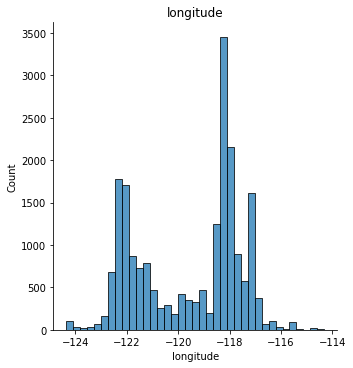

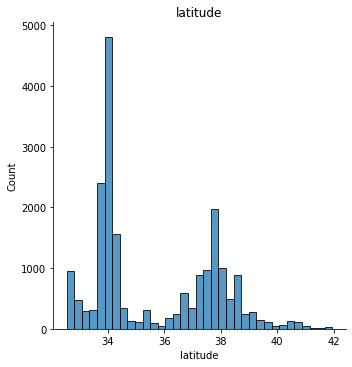

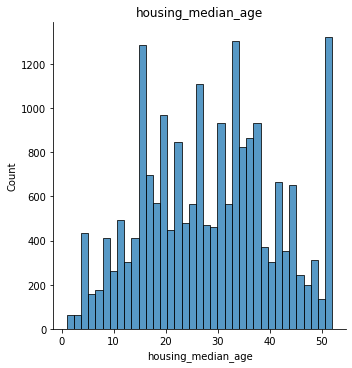

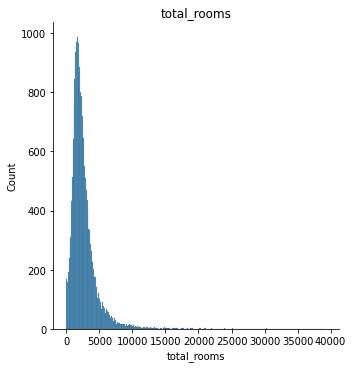

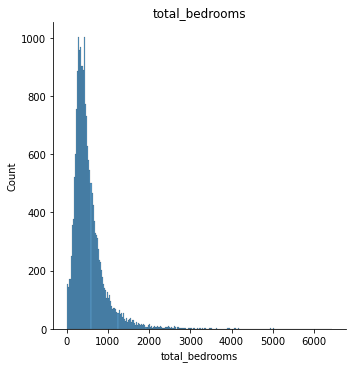

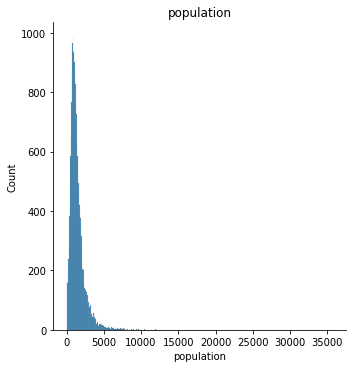

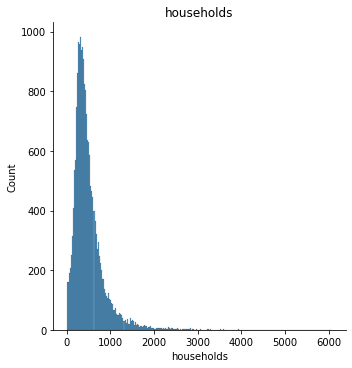

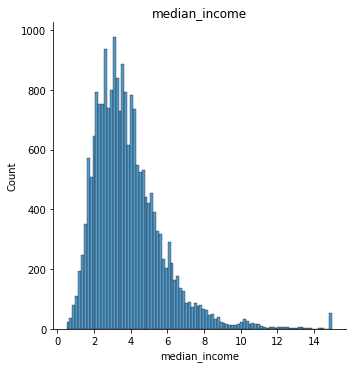

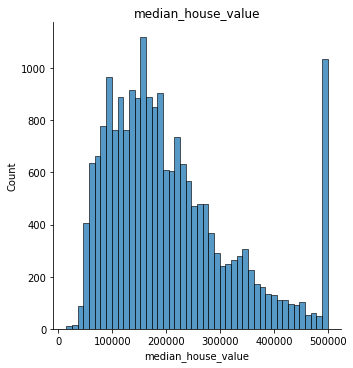

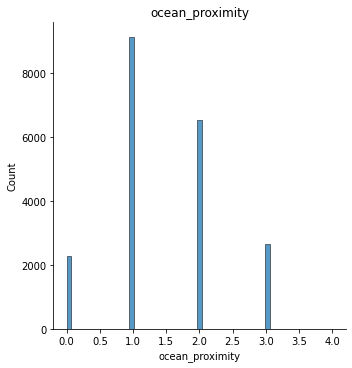

In [62]:
for i in range(10):
    sns.displot(housing[housing.columns[i]])
    plt.title(housing.columns[i])

**Modelo de Machine Learning**

In [90]:
X = housing.drop(columns="median_house_value").values
y = housing["median_house_value"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, test_size=0.1, random_state=32)

print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  20640
numero de filas train set     :  2064
numero de filas test set      :  2064


In [91]:
import time
#Diccionario de Hiperparámetros
dicc_knn = {
          'n_neighbors' : [3, 5, 10],
          'weights' : ['uniform', 'distance'],
          'metric' : ['euclidean', 'minkowski'],
          'algorithm' : ['auto','brute', 'kd_tree']
          }


grid_knn = GridSearchCV(estimator = knn, param_grid = dicc_knn, cv = 20) 

start_time = time.time() #Tiempo de inicio 

grid_result_knn = grid_knn.fit(X_train, y_train)
print("Tuned Hyperparameters :", grid_knn.best_params_)
print("Accuracy :",grid_knn.best_score_)
print("Este modelo se ajustó en",(time.time() - start_time),"segundos.") 

Tuned Hyperparameters : {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Accuracy : 0.0324542569081404
Este modelo se ajustó en 10.136322498321533 segundos.


In [92]:
#MODELO KNN HIPERPARAMETROS
knng = neighbors.KNeighborsClassifier(algorithm = 'auto', metric= 'euclidean', n_neighbors=10, weights='distance').fit(X_train, y_train)

# predecir
knng_pred = knng.predict(X_test)
y_true = y_test

#Guardamos los datos para la comparativa final
accuracyX=accuracy_score(y_test, knng_pred)
recallX=recall_score(y_test, knng_pred,average='weighted')
precisionX=precision_score(y_test, knng_pred,average='weighted' )
fscoreX=f1_score(y_test, knng_pred,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,knng_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracyX)
print('recall:     ',recallX)
print('precision:  ',precisionX)
print('f-score:    ',fscoreX)
print("")


Matriz de confusion:
 
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 65]]

Metricas:
 
accuracy:    0.03294573643410853
recall:      0.03294573643410853
precision:   0.01886364487476722
f-score:     0.02064956737921854



In [93]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 20, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
 

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model

start_time = time.time() #Tiempo de inicio 
rfc_random.fit(X_train, y_train)
print("Este modelo se ajustó en",(time.time() - start_time),"segundos.") 
print(rfc_random.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Este modelo se ajustó en 39.70307898521423 segundos.
{'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False}


In [102]:
#MODELO RANDOMFOREST HIPERPARAMETROS
rfcg =  RandomForestClassifier(n_estimators=20,min_samples_split=10,min_samples_leaf=1,max_features='auto',max_depth=20, bootstrap=False).fit(X_train,y_train)

#predecir
y_true =  y_test
rfcg_pred = rfcg.predict(X_test)

#Guardamos los datos para la comparativa final
accuracyY=accuracy_score(y_true, rfcg_pred)
recallY=recall_score(y_true, rfcg_pred,average='weighted')
precisionY=precision_score(y_true, rfcg_pred,average='weighted')
fscoreY=f1_score(y_true, rfcg_pred,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,rfcg_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracyY)
print('recall:     ',recallY)
print('precision:  ',precisionY)
print('f-score:    ',fscoreY)
print("")


Matriz de confusion:
 
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0 92]]

Metricas:
 
accuracy:    0.046511627906976744
recall:      0.046511627906976744
precision:   0.018691168327796236
f-score:     0.026270935463610475



In [101]:
import time

#Diccionario de Hiperparámetros
dicc_rlog = {
          'penalty' : ['l2'],
          'C' : [1, 0.01],
          'class_weight' : ['balanced',None],
          'solver' : ['liblinear'],
          }
grid_lr = GridSearchCV(estimator = lr, param_grid = dicc_rlog, refit = True, n_jobs=-1) 

start_time = time.time() #Tiempo de inicio 

grid_result_lr = grid_lr.fit(X_train, y_train)
grid_result_lr
print("Tuned Hyperparameters :", grid_result_lr.best_params_)
print("Accuracy :",grid_result_lr.best_score_)
print("Este modelo se ajustó en",(time.time() - start_time),"segundos.") 

Tuned Hyperparameters : {'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.05281153764780555
Este modelo se ajustó en 200.74363446235657 segundos.


In [103]:
#MODELO REGRESION LOGISTICA HIPERPARAMETROS
lrg = LogisticRegression(C=0.01, class_weight=None, penalty='l2', solver = 'liblinear').fit(X_train, y_train)

# predecir
lr_pred = lrg.predict(X_test)
y_true = y_test

#Guardamos los datos para la comparativa final
accuracyZ=accuracy_score(y_test, lr_pred)
recallZ=recall_score(y_test, lr_pred,average='weighted')
precisionZ=precision_score(y_test, lr_pred,average='weighted' )
fscoreZ=f1_score(y_test, lr_pred,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,lr_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracyZ)
print('recall:     ',recallZ)
print('precision:  ',precisionZ)
print('f-score:    ',fscoreZ)
print("")


Matriz de confusion:
 
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   2]
 [  0   0   0 ...   0   0 101]]

Metricas:
 
accuracy:    0.05377906976744186
recall:      0.05377906976744186
precision:   0.0064471800198425515
f-score:     0.011085843372532152



In [110]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#DECISION TREE
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

#predecir
y_true =  list(y_test)
y_pred = list(dtree.predict(X_test)) 

#Guardamos los datos para la comparativa final
accuracyW=accuracy_score(y_test, y_pred)
recallW=recall_score(y_test, y_pred,average='weighted')
precisionW=precision_score(y_test, y_pred,average='weighted' )
fscoreW=f1_score(y_test, y_pred,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracyW)
print('recall:     ',recallW)
print('precision:  ',precisionW)
print('f-score:    ',fscoreW)
print("")


Matriz de confusion:
 
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  2 60]]

Metricas:
 
accuracy:    0.031007751937984496
recall:      0.031007751937984492
precision:   0.026881298807702667
f-score:     0.028687159633157714



**RESUMEN DEL ANÁLISIS DE DATOS**

In [111]:
Datos = {'n_modelo': ['knn','random_forest','logistic_regression','decision_tree'],
          'accuracy': [accuracyX,accuracyY,accuracyZ,accuracyW],
          'recall': [recallX,recallY,recallZ,recallW],
          'precision': [precisionX,precisionY,precisionZ,precisionW],
          'f-score': [fscoreX,fscoreY,fscoreZ,fscoreW],
}
AnalisisDeDatos=pd.DataFrame(Datos)
AnalisisDeDatos

,n_modelo,accuracy,recall,precision,f-score
0,knn,0.032946,0.032946,0.018864,0.020650
1,random_forest,0.046512,0.046512,0.018691,0.026271
2,logistic_regression,0.053779,0.053779,0.006447,0.011086
3,decision_tree,0.031008,0.031008,0.026881,0.028687


**CONCLUSIONES**

Podemos ver que los modelos de regresión no son muy buenos en este ejercicio, pues ninguna de las métricas supera siquiera el 0.1.
Podemos concluir que es necesario seguir aprendiendo nuevos modelos y nuevas herramientas para afrontar más problemas en el mundo de Machine Learning.